## Bike Sharing case study


### Problem Statement:

  A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


  A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

Essenitally, The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Step 1: Reding and understanding the data

Let us first import the Numpy and Pandas and read the data set 


In [1]:
#  supress warnings

import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


inspect the various aspects of the bike sharing dataframe

In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Data preprocessing
# removing the unnecessary columns from the dataframe

df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [8]:
df1 = df
df1.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [9]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
df1.shape

(730, 12)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Step - 2: Data Visulaization

Here we'll visulaise our data using `seaborn` and `matlplotlib`

In [12]:
# importing the necessary libraries

import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising numerical variables

making a pairplot of all numeric variables

In [13]:
df1.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

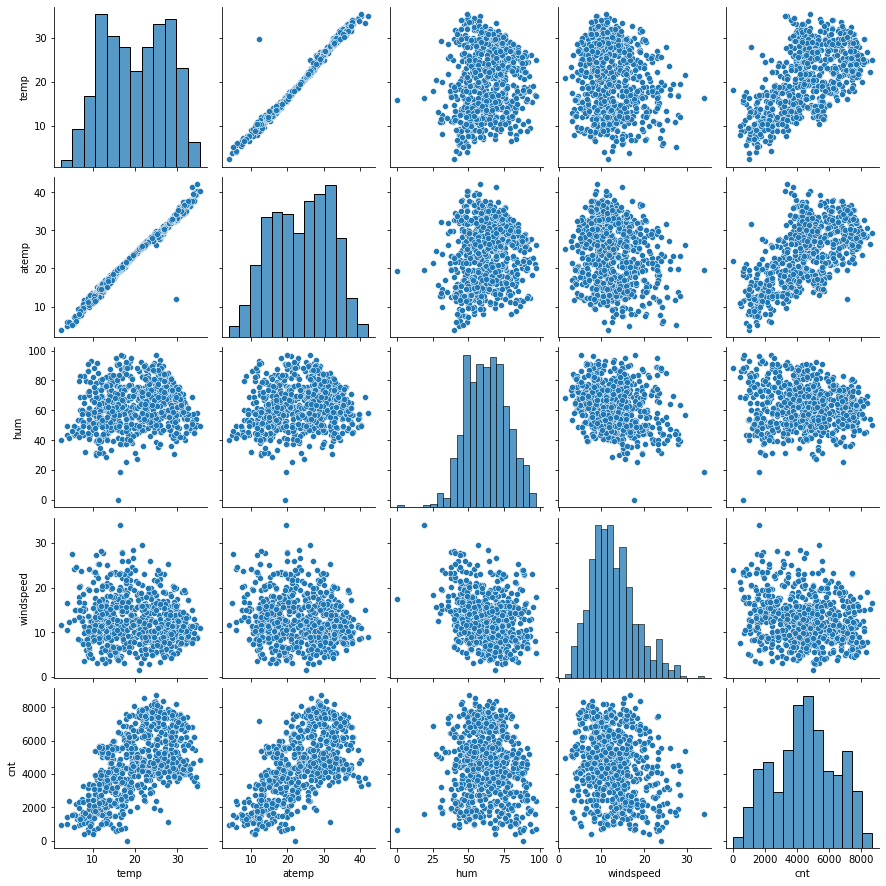

In [14]:
sns.pairplot(df1[['temp', 'atemp', 'hum', 'windspeed', 'cnt']])
plt.show()

#### We can clearly see there is strong correlation between target varible 'cnt' and predictor variables 'temp' and 'atemp'
#### Also there is strong correlation between predictor variables 'temp' and 'atemp'
- we will see in futher steps how we will deal with these variables

## Step 3: Data Preparation

### Dummy variables

#### 1) Season

In [15]:
# We are inspecting every categorical variable one by one

df1['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [16]:
# Applying the mapping to the season column

df1['season'] = df1['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [17]:
df1.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [18]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'ssn'

ssn = pd.get_dummies(df1['season'])

In [19]:
ssn.value_counts()

fall  spring  summer  winter
1     0       0       0         188
0     0       1       0         184
      1       0       0         180
      0       0       1         178
dtype: int64

Now we can drop first column 'fall' as this can describe by the last three columns, as below-

- fall ----> 0 0 0 
- spring --> 1 0 0 
- summer --> 0 1 0
- winter --> 0 0 1

In [20]:
# Dropping first column 'fall'

ssn = pd.get_dummies(df1['season'], drop_first = True)

In [21]:
ssn.value_counts()

spring  summer  winter
0       0       0         188
        1       0         184
1       0       0         180
0       0       1         178
dtype: int64

In [22]:
ssn.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [23]:
# Adding the results to the original data frame and dropping the season variable as we created dummy varibales for it

df1 = pd.concat([df1,ssn], axis=1)
df1.drop(['season'],axis=1, inplace=True)

In [24]:
df1.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


- We can easily observe unique data trend in sesaons with target varibale columns so it should be included in our durther analysis.

#### 2) yr (year)

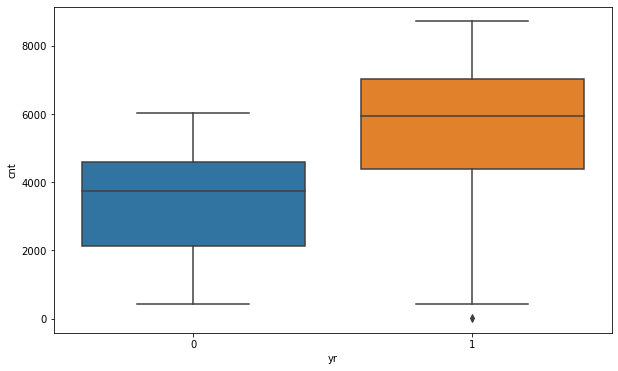

In [25]:
# Visualising the second categorical variable 'yr'
plt.figure(figsize=(10,6))
sns.boxplot(x='yr',y='cnt',data=df1)
plt.show()

- By looking into the data dictionary 'yr' column represents as year (0: 2018, 1:2019) as it is already in 0 and 1, we don't need to change anything in the column. Also looking into the boxplot we can easily conclude that 2019 has shown the greatest increase in demand so it can be good predictor in our analysis.

#### 3) mnth (month)

In [26]:
# For our third categorical variable 'mnth' we have to use dummy varibales as we did in season

df1['mnth'] = df1['mnth'].map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df1.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [27]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'month'

month = pd.get_dummies(df1['mnth'], drop_first= True)
month.value_counts()

aug  dec  feb  jan  jul  jun  mar  may  nov  oct  sep
1    0    0    0    0    0    0    0    0    0    0      62
0    1    0    0    0    0    0    0    0    0    0      62
     0    0    1    0    0    0    0    0    0    0      62
               0    1    0    0    0    0    0    0      62
                    0    0    1    0    0    0    0      62
                              0    1    0    0    0      62
                                   0    0    1    0      62
                         1    0    0    0    0    0      60
                         0    0    0    1    0    0      60
                                        0    0    1      60
                                                  0      60
          1    0    0    0    0    0    0    0    0      56
dtype: int64

In [28]:
# now adding the dummy variable in the data frame and dropping the mnth

df1 = pd.concat([df1,month], axis=1)
df1.drop(['mnth'],axis=1, inplace=True)
df1.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


#### 4) Holiday

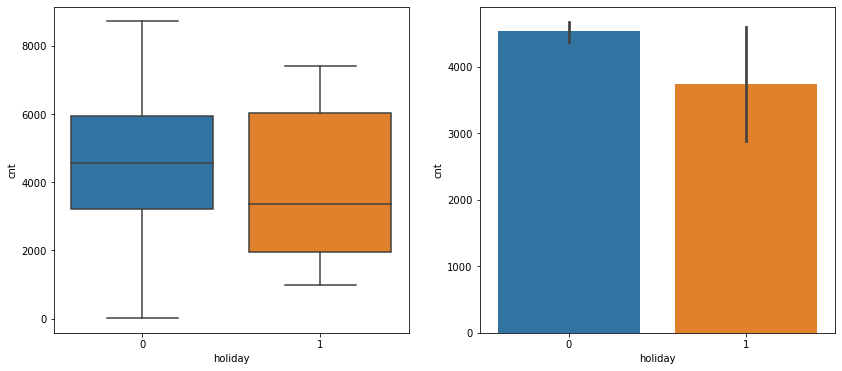

In [29]:
# Visualising the fourth categorical variable 'holiday'

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x='holiday',y='cnt',data=df1)
plt.subplot(1,2,2)
sns.barplot(x='holiday',y='cnt',data=df1)
plt.show()

- We consilder 'holiday' column too as it is showing specific relation with 'cnt' variable

#### 5. Weekday

In [30]:
# For our fifth categorical variable 'weekday' we have to use dummy varibales as we did in season

df1['weekday'] = df1['weekday'].map({0:'sun',1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'}) 

In [31]:
df1.head()

,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,mon,1,2,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,tue,1,2,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,wed,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,thu,1,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,fri,1,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [32]:
wkday = pd.get_dummies(df1['weekday'], drop_first= True)

wkday.value_counts()

mon  sat  sun  thu  tue  wed
1    0    0    0    0    0      105
0    0    0    0    1    0      105
     1    0    0    0    0      104
     0    1    0    0    0      104
          0    1    0    0      104
               0    0    1      104
                         0      104
dtype: int64

In [33]:
df1 = pd.concat([df1,wkday], axis=1)
df1.drop(['weekday'],axis=1, inplace=True)
df1.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,1,2,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,2,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


#### 6) workingday

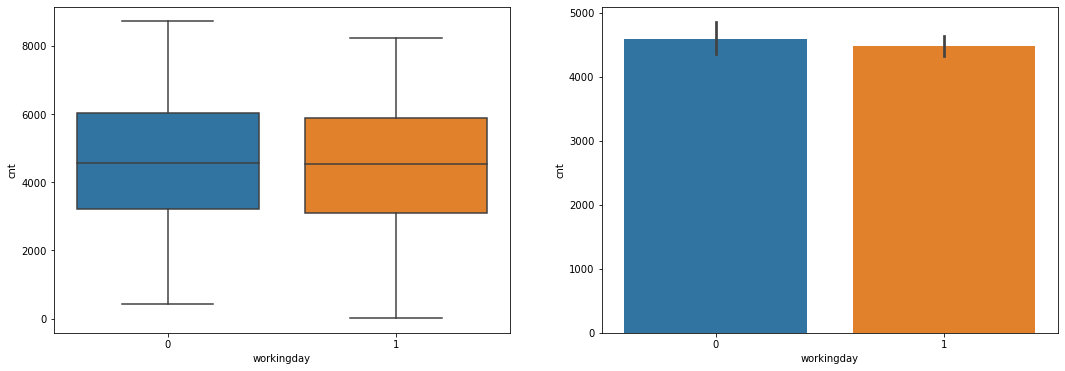

In [34]:
# Visualising the sixth categorical variable 'workingday'

plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.boxplot(x='workingday',y='cnt',data=df1)
plt.subplot(1,2,2)
sns.barplot(x='workingday',y='cnt',data=df1)
plt.show()

- We can see that there is no specific trend showing in workingday with respect to cnt varibale. We might remove it as it has very little diference showing in the plot. But to get more evidence we will see in further steps so we are keeping it for now.

#### 7) weathersit

In [35]:
# For our seventh categorical variable 'weathersit' we have to use dummy varibales as we did in season

df1['weathersit'] = df1['weathersit'].map({1:'clear', 2:'mist', 3:'light rain', 4:'heavy rain'})


In [36]:
df1.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,1,mist,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,1,mist,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
wetsit = pd.get_dummies(df1['weathersit'], drop_first = True)
wetsit.head()

,light rain,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [38]:
wetsit.value_counts()

light rain  mist
0           0       463
            1       246
1           0        21
dtype: int64

#### Interpretation

- 00 - clear
- 01 - mist
- 10 - light rain

Note - there is no weather situation like 'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog' 

In [39]:
# now adding the dummy variable in the data frame and dropping the weathersit

df1 = pd.concat([df1,wetsit], axis=1)
df1.drop(['weathersit'],axis=1, inplace=True)

In [40]:
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light rain,mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
#inspeting the prepocessed data frame

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  aug         730 non-null    uint8  
 12  dec         730 non-null    uint8  
 13  feb         730 non-null    uint8  
 14  jan         730 non-null    uint8  
 15  jul         730 non-null    uint8  
 16  jun         730 non-null    uint8  
 17  mar         730 non-null    uint8  
 18  may         730 non-null    uint8  
 19  nov         730 non-null    u

## Step 4: Splitting the data into Training and testing sets

In [42]:
# importing useful libraries

from sklearn.model_selection import train_test_split

In [43]:
# using random state we will sure that the train and test set will always have the same rows

np.random.seed(0)
df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the features

In [44]:
# using MinMax scaling
# importing the useful libraries

from sklearn.preprocessing import MinMaxScaler

In [45]:
# creating the object of MinMaxScaler function

scaler = MinMaxScaler()

In [46]:
#Applying the scaler function to all the columns of the training data frame except the '0/1' and 'dummy variables'

df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul',
       'jun', 'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu',
       'tue', 'wed', 'light rain', 'mist'],
      dtype='object')

In [47]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [48]:
#checking the data frame

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light rain,mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1


In [49]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thu,tue,wed,light rain,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


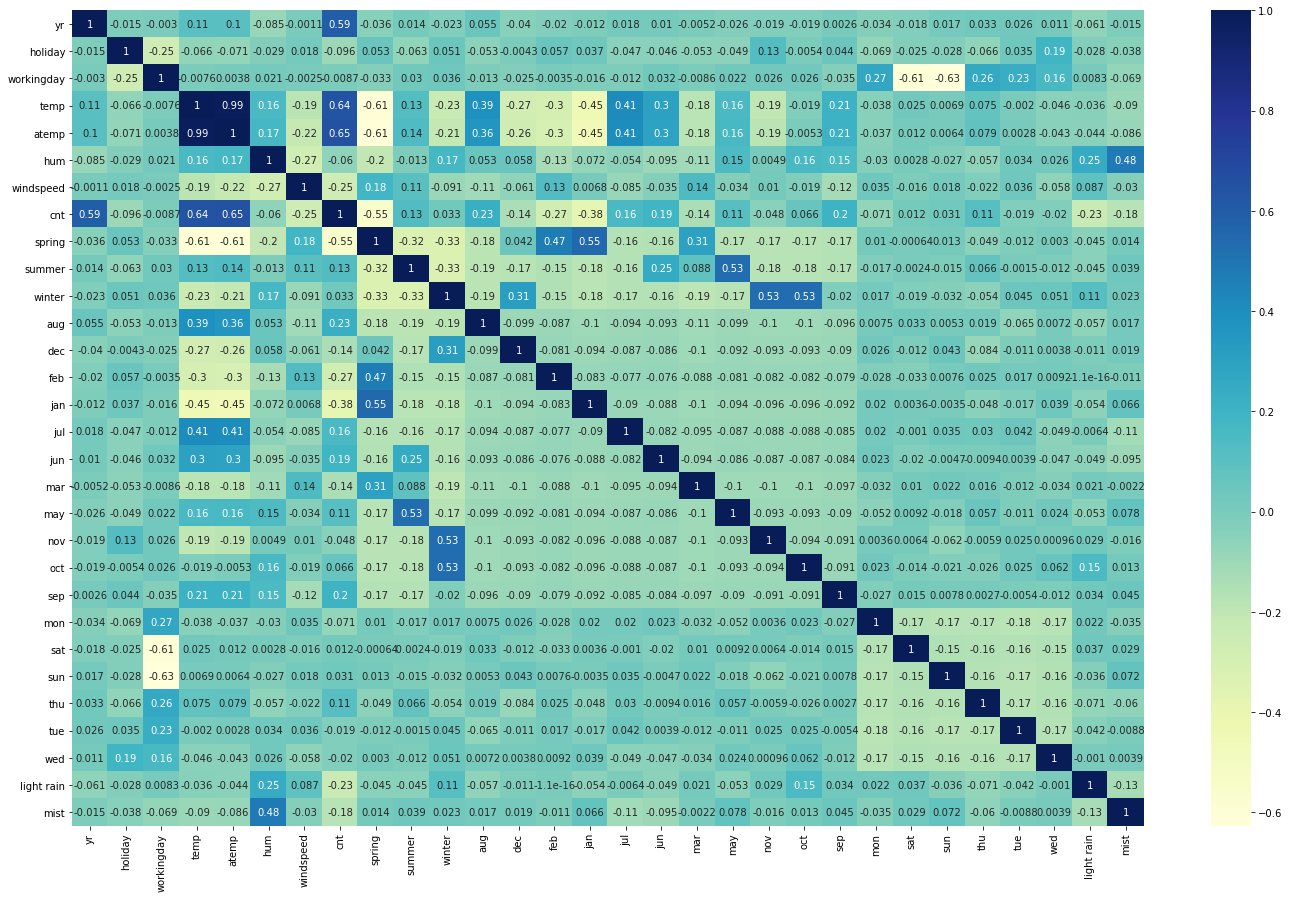

In [50]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(24,15))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

### Dividing into X and Y sets for the model building

In [51]:
y_train = df_train.pop('cnt')
X_train = df_train

### Building the model using RFE

In [52]:
# importing RFE and linear regression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [53]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train,y_train)

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 7),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 13),
 ('tue', False, 8),
 ('wed', False, 11),
 ('light rain', True, 1),
 ('mist', True, 1)]

In [55]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'light rain', 'mist'],
      dtype='object')

In [56]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'aug', 'feb', 'jun', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

### Building Model using statsmodel, for the detailed statistics

In [57]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [58]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [59]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [60]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 14 Jul 2021   Prob (F-statistic):          3.34e-189
Time:                        20:08:06   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.0

#### p-values are in good range of all the varibales so we are moving for VIF

In [61]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.76
4,hum,1.93
12,nov,1.76
10,jan,1.68
15,mist,1.57
9,dec,1.49





## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [62]:
y_train_cnt = lm.predict(X_train_rfe)

In [63]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

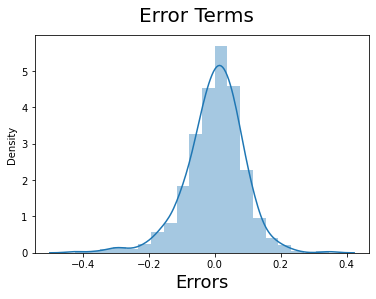

In [64]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions


#### Applying the scaling on the test sets


In [65]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [66]:
y_test = df_test.pop('cnt')
X_test = df_test

In [67]:
X_test.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'light rain', 'mist'],
      dtype='object')

In [68]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring','summer', 'winter', 'dec', 'jan', 'jul', 'nov', 'sep', 'light rain','mist']]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

In [69]:
# Making predictions
y_pred = lm.predict(X_test_rfe)


## Model Evaluation

Text(0.5, 0, 'y_test')

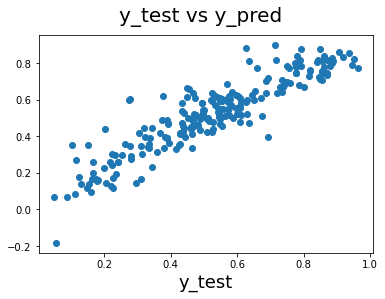

In [70]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
#plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [71]:
#calculating the R-squared score on the test set

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8216461699732155